In [3]:
#import Min_vertex_cover as mvc
import networkx as nx
import rustworkx as rx
import csv
import tensorflow as tf


import pennylane as qml
from pennylane.wires import Wires
from pennylane import numpy as np
from pennylane import qaoa
import dominantset as ds


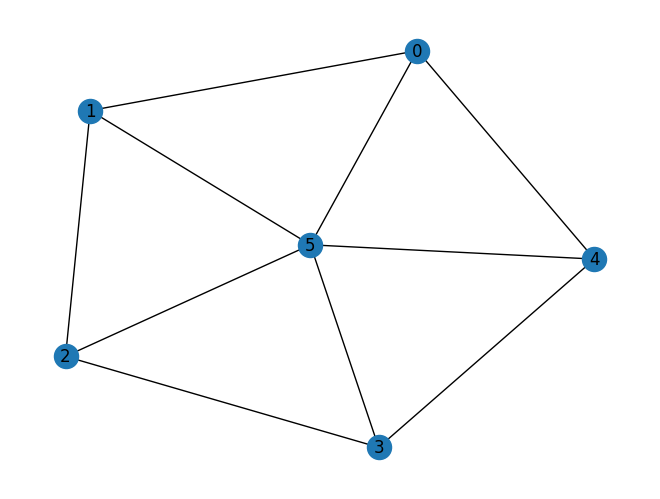

In [13]:
edges = [(0, 1), (1, 2), (2, 3),(3,4),(4,0),(5,0),(5,1),(5,2),(5,3),(5,4)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)


In [7]:
def qaoa_layer(gamma, beta):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(beta, mixer_h)

wires = range(len(graph.nodes()))
depth = 1

def circuit(params, **kwargs):
    for w in wires:
        qml.PauliX(wires=w)
    qml.layer(qaoa_layer, depth, params[0],params[1])

dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)


def exp_values(cost_h,mixer_h):
    bet   = np.arange(0,2*np.pi,0.01)
    gam   = np.linspace(1,1,np.size(bet))
    res   = []
    for i in range(np.size(bet)):
        params = np.array([[gam[i]],[bet[i]]])
        res   += [cost_function(params)]
    return res

In [8]:
cost_h = ds.cost_ds(graph)

mixer_h_1 = qml.pauli.simplify(ds.mixer_ds(graph))
mixer_h = mixer_h_1
exp_value_1 = exp_values(cost_h,mixer_h_1)







/opt/homebrew/lib/python3.11/site-packages/pennylane/operation.py:1921: UserWarning: Tensor object acts on overlapping wires; in some PennyLane functions this will lead to undefined behaviour
  warnings.warn(


In [9]:
off_set = 0
c = []
for a in exp_value_1:
    c += [a.numpy()]
c = np.array(c)
c = c+off_set



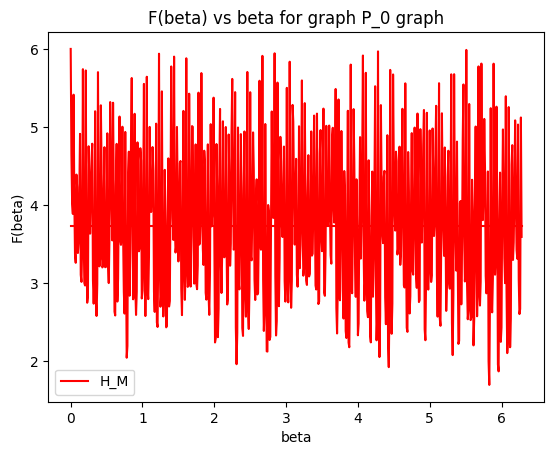

In [12]:
import matplotlib.pyplot as plt
bet   = np.arange(0,2*np.pi,0.01)
plt.plot(bet,c,'r',label = 'H_M')

plt.plot(bet,np.linspace(np.mean(c),np.mean(c),np.size(bet)),'r')

plt.xlabel('beta')
plt.ylabel('F(beta)')
plt.title(f'F(beta) vs beta for graph P_{int(2*off_set)} graph')
plt.legend()

plt.show()

### Path graph

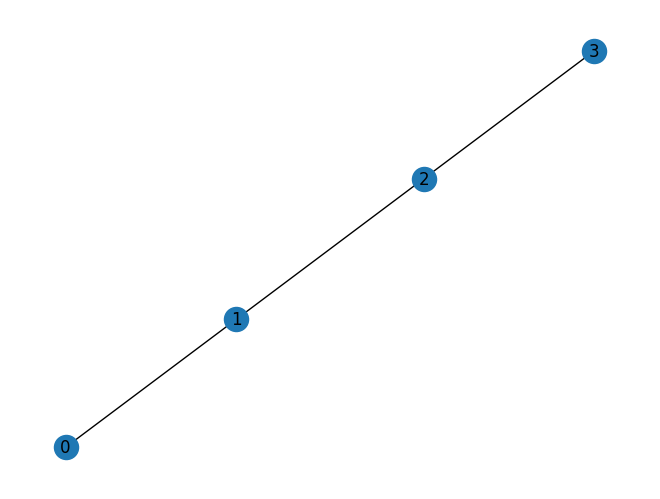

In [7]:
edges = [(0, 1), (1, 2),(2,3)]
graph = nx.Graph(edges)
nx.draw(graph, with_labels=True)

In [8]:
def qaoa_layer(gamma, beta):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(beta, mixer_h)

wires = range(len(graph.nodes()))
depth = 1

def circuit(params, **kwargs):
    for w in wires:
        qml.PauliX(wires=w)
    qml.layer(qaoa_layer, depth, params[0],params[1])

dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)


def exp_values(cost_h,mixer_h):
    bet   = np.arange(0,2*np.pi,0.01)
    gam   = np.linspace(1,1,np.size(bet))
    res   = []
    for i in range(np.size(bet)):
        params = np.array([[gam[i]],[bet[i]]])
        res   += [cost_function(params)]
    return res

In [9]:
cost_h = ds.cost_ds(graph)

mixer_h_1 = qml.pauli.simplify(ds.mixer_ds(graph))
mixer_h = mixer_h_1
exp_value_1 = exp_values(cost_h,mixer_h_1)







In [10]:
off_set = 0
c = []
for a in exp_value_1:
    c += [a.numpy()]
c = np.array(c)
c = c+off_set



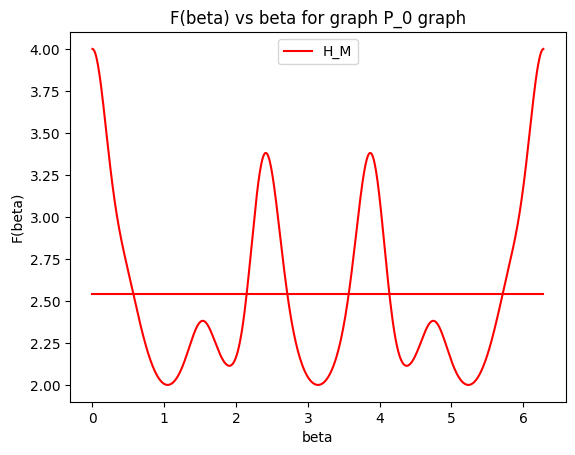

In [11]:
import matplotlib.pyplot as plt
bet   = np.arange(0,2*np.pi,0.01)
plt.plot(bet,c,'r',label = 'H_M')

plt.plot(bet,np.linspace(np.mean(c),np.mean(c),np.size(bet)),'r')

plt.xlabel('beta')
plt.ylabel('F(beta)')
plt.title(f'F(beta) vs beta for graph P_{int(2*off_set)} graph')
plt.legend()
plt.savefig(f'Results/Path-{int(2*off_set)}.png')
plt.show()